#Full Text Article KeyPhrase Extraction

Keyphrase extraction is a textual information processing task concerned with the automatic extraction of representative and characteristic phrases from a document that express all the key aspects of its content. Keyphrases constitute a succinct conceptual summary of a document, which is very useful in digital information management systems for semantic indexing, faceted search, document clustering and classification.

There exist both supervised and unsupervised keyphrase extraction methods. Unsupervised methods are popular because they are domain independent and do not need labeled training data  so I use  unsupervised methode.
The most important merit of unsupervised models is that they can work in a new area or language with little or no adjustments. We can divide the unsupervised techniques into two subsets statistical models  and graphbased models 

**Statistical models:** are models that select candidates based on their statistical features Such as TF and IDF,Sentence Position, Word Position and etc.  The most popular statistical  algorithm is TFIDF, Kpminer, Yake and etc.

**Graph-based Models:** These approaches typically consist of two steps: (1) building a graph representation of the document with words as nodes and semantic relation between them as edges; (2) ranking nodes using a graph-theoretic measure and using the top-ranked ones as keyphrases .The most popular Graph-based   algorithm is Text Rank, Single Rank, Topic Rank, Multipartiti Rank, Scake and etc.
Most of unsupervised  models are implemented using PKE (an open source python-based keyphrase extraction toolkit) and I use PKE toolkit

**Which unsupervised  algorithm  is best for our Texts ?**

Based my experience and test in  multipe keyphrase extraction dataset that contain long  scientific text for example Krapavin, semeval 2010, Nguyen, statistical Models result is better than Graph based models also when we use each dataset DF  count in kpminer algorithm. the results make a significant improvement from other algorithms. So we use Kpminer algorithm for this task purpose. Also we use genism phrase for better bigram and trigram candid phrase detection. first we train genism phrase  based on all covid-19 article for detect commen phrase in this domain  article then we use trained model for detect commen phrase in each article and normal ngram for specific phrase in article.

In the fellow we shown my tests in Keyphrase Extraction Dataset.
for kpminer algorithm use DF of each article and use my prposed way for candid phrase detection.
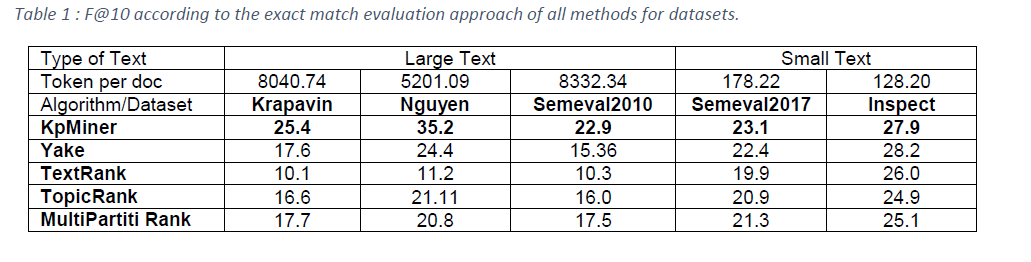


# Prepare Data


In [1]:
import pandas as pd
articles = pd.read_excel("../input/use-cases-data/use_cases_data.xlsx")
articles

,Unnamed: 0,ID,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,text
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...
2,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",Six nos
3,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",of personnel suffered burn injuries during th...
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...
...,...,...,...,...,...,...,...,...,...,...
458019,50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
458020,50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"operation and maintenance of safety systems, ..."
458021,50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN, CCTV should be kept functional at all times
458022,50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN, To review the internal safety audit system ...


In [2]:
# install pke for keyphrase extraction
!pip install git+https://github.com/boudinfl/pke.git

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-qqgdvcoj
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-qqgdvcoj
  Created wheel for pke: filename=pke-1.8.1-py3-none-any.whl size=8763760 sha256=6add2be4cf97c57a50da0bb93782bf0217731341da30afd6460edf7fc66aa66c
  Stored in directory: /tmp/pip-ephem-wheel-cache-g__ubyq4/wheels/72/94/0b/532ef4362c546f6c034da4e1065abc333ce840f8d4cafa1856
Successfully built pke


# Kpminer Compute Covid-19 Articles words DF 
Compute Document Frequency (DF) counts from a collection of documents. 
N-grams up to 3-grams are extracted and converted to their n-stems forms.
Those containing a token that occurs in a stoplist are filtered out.
Output file is in compressed (gzip) tab-separated-values format (tsv.gz)

In [3]:
from pke.base import LoadFile
from string import punctuation
from nltk.corpus import stopwords
import string
from collections import defaultdict
import os
import sys
import gzip

stoplist = list(stopwords.words('english')) + list(string.punctuation)


frequencies = defaultdict(int)
delimiter='\t'

# initialize number of documents
nb_documents = 0


#Note: im limit this item becuase is very time consumed task for my notebook
limite_dataset_article = 50
if limite_dataset_article is not None:
    my_df_articles = articles.head(limite_dataset_article)
else :
    my_df_articles = articles

output_file = 'df.tsv.gz'
for index,article in my_df_articles.iterrows():
    content = str(article.text)
    doc = LoadFile()
    doc.load_document(input=str(content))
    # n is number of n-gram
    doc.ngram_selection(n=3)
    doc.candidate_filtering(stoplist=stoplist)
     # loop through candidates
    for lexical_form in doc.candidates:
        frequencies[lexical_form] += 1
    nb_documents += 1

    if nb_documents % 10 == 0:
        print("{} docs, memory used: {} mb".format(nb_documents,
                                                          sys.getsizeof(
                                                              frequencies)
                                                          / 1024 / 1024))
# create directories from path if not exists
if os.path.dirname(output_file):
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

# dump the df container
with gzip.open(output_file, 'wb') as f:
    # add the number of documents as special token
    first_line = '--NB_DOC--' + delimiter + str(nb_documents)
    f.write(first_line.encode('utf-8') + b'\n')
    for ngram in frequencies:
        line = ngram + delimiter + str(frequencies[ngram])
        f.write(line.encode('utf-8') + b'\n')



10 docs, memory used: 0.00449371337890625 mb
20 docs, memory used: 0.0088958740234375 mb
30 docs, memory used: 0.01767730712890625 mb
40 docs, memory used: 0.01767730712890625 mb
50 docs, memory used: 0.01767730712890625 mb


After computing document frequency file use df file in kpminer algorithm

In [4]:
from pke.unsupervised import KPMiner
from pke import load_document_frequency_file

def phrase_extraction(input_text):
    extractor = KPMiner()
    extractor.load_document(input=input_text, language='en')
    lasf = 1
    cutoff = 400
    extractor.candidate_selection(lasf=lasf, cutoff=cutoff, stoplist=stoplist)

    # load document frequency file
    df = load_document_frequency_file(input_file='df.tsv.gz')
    alpha = 2.3
    sigma = 3.0
    try:
        extractor.candidate_weighting( alpha=alpha, sigma=sigma,df=df)
    except Exception as es :
        print(es)
    keyphrases = extractor.get_n_best(n=20)
    return keyphrases


#Note: im limit this item becuase is very time consumed task for my notebook
limite_dataset_article = 5
if limite_dataset_article is not None:
    my_df_articles = articles.head(limite_dataset_article)
else :
    my_df_articles = articles

keywords_tokens = list()
for index,article in my_df_articles.iterrows():
    content = str(article.text)
    print('ArticleId: ' , article.ID)
    key_phrases = phrase_extraction(content)
    keywords_tokens.append(key_phrases)
    print(key_phrases)
    print('*'*100)

my_df_articles['keywords'] = keywords_tokens

ArticleId:  OISD/CS/2020-21/P&E/01
[('oisd', 4.672425341971495)]
****************************************************************************************************
ArticleId:  OISD/CS/2020-21/P&E/01
[('fire incident', 12.438588651582108), ('effluent treatment', 12.438588651582108), ('effluent treatment plant', 12.438588651582108), ('treatment plant', 12.438588651582108), ('inlet sump', 12.438588651582108), ('treatment', 9.34485068394299), ('refinery', 9.34485068394299), ('effluent', 8.17492568250068), ('plant', 7.34485068394299), ('introduction title', 6.219294325791054), ('indian refinery', 6.219294325791054), ('indian refinery location', 6.219294325791054), ('refinery location', 6.219294325791054), ('one death', 6.219294325791054), ('burn injuries', 6.219294325791054), ('persons brief', 6.219294325791054), ('fire incident took', 6.219294325791054), ('fire incident took place', 6.219294325791054), ('incident took', 6.219294325791054), ('incident took place', 6.219294325791054)]
****

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
my_df_articles['keywords'][0]

[('oisd', 4.672425341971495)]

In [6]:
my_df_articles.shape

(5, 11)

In [7]:
#my_df_articles['keywords'] = my_df_articles['keywords'].astype(str)

In [8]:
my_df_articles = my_df_articles.explode('keywords')
#my_df_articles.head(5)

In [9]:
my_df_articles = my_df_articles.explode('keywords') #re-explode the column to get the words and numeric values seperated , then we will delete rows that contains numeric values. 

In [10]:
my_df_articles = my_df_articles.groupby(
    'ID', group_keys=False
).apply(lambda d: d.iloc[:-1].assign(KpminerKeywordsWeight=d.keywords.values[1:]))

my_df_articles.head(5)

,Unnamed: 0,ID,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,text,keywords,KpminerKeywordsWeight
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt,oisd,4.67243
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt,4.67243,fire incident
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,fire incident,12.4386
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,12.4386,effluent treatment
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment,12.4386


In [11]:
my_df_articles['_keywords'] = my_df_articles['keywords'].map(lambda x: True if any(i.isdigit() for i in str(x)) else False)
my_df_articles = my_df_articles[my_df_articles['_keywords'] == False]

my_df_articles.head(5)

,Unnamed: 0,ID,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,text,keywords,KpminerKeywordsWeight,_keywords
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt,oisd,4.67243,False
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,fire incident,12.4386,False
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment,12.4386,False
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment plant,12.4386,False
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,treatment plant,12.4386,False


In [12]:
my_df_articles.sort_values('KpminerKeywordsWeight')
tmp = my_df_articles.groupby('ID').size()
rank = tmp.map(range)
rank =[item for sublist in rank for item in sublist]
my_df_articles['KeyRank'] = rank

In [13]:
my_df_articles['KeywordsId'] = range(1, len(my_df_articles) + 1)
#my_df_articles.head(20)

In [14]:
#my_df_articles['KeyRank'] = my_df_articles.groupby('ID')['KpminerKeywordsWeight'].rank(ascending=False)

In [15]:
my_df_articles = my_df_articles.rename(columns={"ID": "ArticleId" , "text": "Abstract"})
articles = articles.rename(columns={"ID": "ArticleId", "text": "Abstract"}) 

In [16]:
df = my_df_articles.copy()
title_abs_df = articles.copy()

In [17]:
#read Article KeyPhrase and Article Title
#df = #pd.read_csv('../input/covid19keyphraseextraction/Covid-19Keywords.csv', delimiter=',', encoding='utf-8')
#title_#abs_df = pd.read_csv('../input/covid19titlesabstract/titles_abs.csv', delimiter=',', encoding='utf-8')

In [18]:
df.head(5)

,Unnamed: 0,ArticleId,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,Abstract,keywords,KpminerKeywordsWeight,_keywords,KeyRank,KeywordsId
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt,oisd,4.67243,False,0,1
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,fire incident,12.4386,False,1,2
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment,12.4386,False,2,3
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment plant,12.4386,False,3,4
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,treatment plant,12.4386,False,4,5


In [19]:
title_abs_df.head(5)

,Unnamed: 0,ArticleId,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,Abstract
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...
2,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",Six nos
3,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",of personnel suffered burn injuries during th...
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...


In [20]:
#prepare Graph Nodes 
nodes = pd.DataFrame()
df1 = df.rename(columns={"keywords": "name"})
nodes['name'] = df1.name.unique()
nodes['nodeid'] = nodes.index.values
# if want filter document that contains specific keyphrase 
filter_doc_by_keyphrase=[]

if len(filter_doc_by_keyphrase) != 0 :
    query =' or '.join(['name.str.contains("{}")'.format(word) for word in filter_doc_by_keyphrase])
    filter = nodes.query(query)
    df2 = pd.merge(df1, filter, on='name', how='inner')
    filtered_df = pd.merge(df1, df2, on='ArticleId', how='inner')
    nodes =  pd.DataFrame()
    nodes['name'] = filtered_df.name_x.unique()
    nodes['nodeid'] = nodes.index.values


df1

,Unnamed: 0,ArticleId,date,INTRODUCTION,BRIEF OF INCIDENT,OBSERVATIONS/ SHORTCOMINGS,REASONS OF FAILURE/ ROOT CAUSE,CONCLUSION,RECOMMENDATIONS,Abstract,name,KpminerKeywordsWeight,_keywords,KeyRank,KeywordsId
0,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OISD/CS/2020-21/P&E/01 Dt,oisd,4.67243,False,0,1
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,fire incident,12.4386,False,1,2
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment,12.4386,False,2,3
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,effluent treatment plant,12.4386,False,3,4
1,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",: 29/04/2020 INTRODUCTION Title: Fire incident...,treatment plant,12.4386,False,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...,recovery,4.67243,False,974,975
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...,implementation,4.67243,False,975,976
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...,system,3.08746,False,976,977
4,0,OISD/CS/2020-21/P&E/01,2020-04-29 00:00:00,Title: Fire incident in Effluent treatment pla...,BRIEF OF INCIDENT,Volatile Organic Compound (VOC) recovery syst...,Possible source of fuel for the fire incident:...,"From the above analysis, it is concluded that ..."," During any hot work, the risk should be reas...",OBSERVATIONS/ SHORTCOMINGS  Volatile Organic...,etp,3.08746,False,977,978


In [21]:

from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt


#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12               #10 
mpl.rcParams['savefig.dpi']=1000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 
#you can play with the parameters in the functions
def plot_wordcloud(words_df,count_words = 200,keyrank=15,title = 'Most common top  keyphrases in the articles '):
    words_df = words_df.query('KeyRank < {}'.format(keyrank))
    words_df = words_df[['ArticleId','name']]
    frequency = words_df.groupby('name')['ArticleId'].count().reset_index()
    frequency = frequency.sort_values(by='ArticleId', ascending=False).head(count_words)
    frequencies = {}
    for index,word in frequency.iterrows():
        keyword = word[0].replace(' ','_')
        count = word[1]
        frequencies[keyword] = count
    wordcloud = WordCloud(min_font_size=12,max_font_size=80 ,width=1200, height=800).generate_from_frequencies(frequencies)
    plt.figure(figsize=(15,10))
    
    plt.title(title, fontdict={'size': 22, 'color': 'green', 
                                      'verticalalignment': 'bottom'})
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


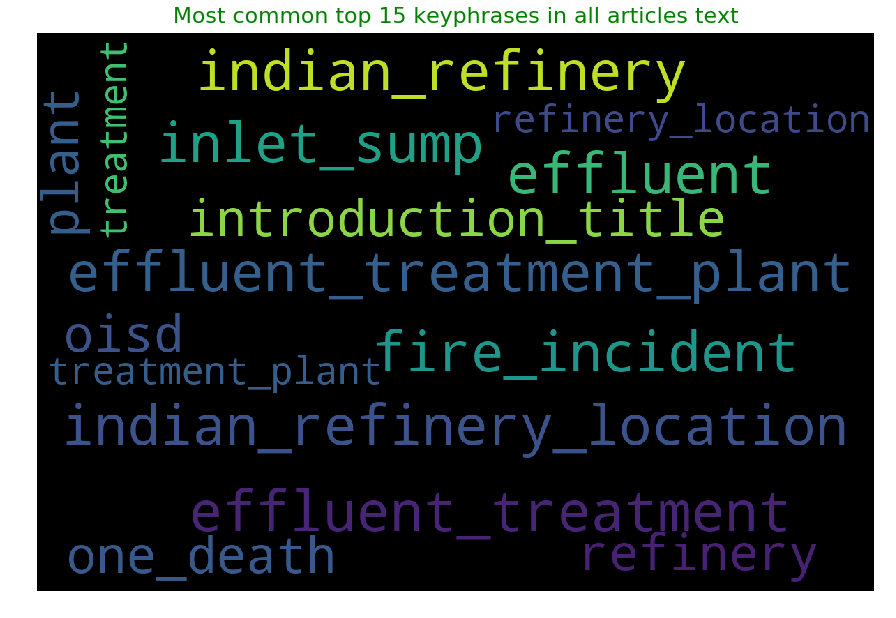

In [22]:
plot_wordcloud(df1,title = 'Most common top 15 keyphrases in all articles text')

also we can filtered words co-occurence


In [23]:
def filter_df(filter_doc_by_keyphrase):
    query =' or '.join(['name =="{}" '.format(word) for word in filter_doc_by_keyphrase])
    dff = df1[['name']]
    filter = dff.query(query)
    df2 = pd.merge(df1, filter, on='name', how='inner')
    filtered_df = pd.merge(df1, df2, on='ArticleId', how='inner')
    result = filtered_df.rename(columns={"KeywordsId_x": "KeywordsId","name_x":"name","KeyRank_x":"KeyRank","StemmedKeywords_x":"StemmedKeywords","KpminerKeywordsWeight_x":"KpminerKeywordsWeight"})
    result = result[["KeywordsId","ArticleId","name","KpminerKeywordsWeight","KeyRank"]]
    return result

In [24]:
"""filter_doc_by_keyphrase = ['risk']

covid_19df = filter_df(filter_doc_by_keyphrase)
plot_wordcloud(covid_19df,keyrank=1,title = 'Most common top 5 keyphrases in article')"""

"filter_doc_by_keyphrase = ['risk']\n\ncovid_19df = filter_df(filter_doc_by_keyphrase)\nplot_wordcloud(covid_19df,keyrank=1,title = 'Most common top 5 keyphrases in article')"

In [25]:
"""filter_doc_by_keyphrase = ['pipe','fire','gaz']

covid_19df = filter_df(filter_doc_by_keyphrase)
plot_wordcloud(covid_19df,keyrank=5,title = 'Most common top 10 keyphrases in articles')"""

"filter_doc_by_keyphrase = ['pipe','fire','gaz']\n\ncovid_19df = filter_df(filter_doc_by_keyphrase)\nplot_wordcloud(covid_19df,keyrank=5,title = 'Most common top 10 keyphrases in articles')"

In [26]:
#df_x = my_df_articles.copy()

In [27]:
#df_x.head(2)

In [28]:
#dfx.columns

In [29]:
#The minimum number of times that two words have appeared in different articles as important key phrases
coo_occurence_count = 1

# max keyphrase rank in each article
keyranks = 500

#prepare Graph Edges
dfx = my_df_articles.copy()
dfx = dfx.rename(columns={"keywords": "name"})
dfx = pd.merge(dfx,nodes,on='name',how='inner')
dfx = dfx.query('KeyRank < {}'.format(keyranks))
dfx = dfx[['ArticleId','nodeid']]
df2 = dfx
df3 = pd.merge(dfx, df2, on='ArticleId')
co_matrix = df3.query('nodeid_x != nodeid_y ')
co_matrix = co_matrix.groupby(['nodeid_x' , 'nodeid_y']).count().reset_index()
important_relation = co_matrix.query('ArticleId > {}'.format(coo_occurence_count))
edges = important_relation.rename(columns={"nodeid_x": "source","nodeid_y":"target","ArticleId":"weight"})
edges

,source,target,weight
0,0,1,20
1,0,2,20
2,0,3,20
3,0,4,20
4,0,5,20
...,...,...,...
1801,42,37,16
1802,42,38,16
1803,42,39,16
1804,42,40,16


In [30]:
#Set Node and Edges in networkx 
import networkx as nx
G = nx.from_pandas_edgelist(edges, 'source', 'target', ['weight'])
nx.set_node_attributes(G,  pd.Series(nodes.name, index=nodes.nodeid).to_dict(),'name')
#label_dict = pd.Series(nodes.name, index=nodes.nodeid).to_dict()


In [31]:
#Generates community sets determined by label propagation
from networkx.algorithms.community import label_propagation_communities
c = list(label_propagation_communities(G))
node_class = {}
j = 0
for part in c :
    if len(part) / len(G.nodes) > 0.01 :
        j += 1
        for node in part:
            node_class[node] = j
    else:
        for node in part:
             node_class[node] = 0

In [32]:
#Use Eigenvector Centrality to measure of the influence of a node in a network
centrality = nx.eigenvector_centrality(G)
nodes_centerality = {}
for v, c in centrality.items() :
    nodes_centerality[v] = c

In [33]:
# use pyvis to build a python based approach to constructing and visualizing network
!pip install pyvis

ERROR: sacred 0.8.1 has requirement jsonpickle<2.0,>=1.2, but you'll have jsonpickle 2.0.0 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 1.3
    Uninstalling jsonpickle-1.3:
      Successfully uninstalled jsonpickle-1.3


In [34]:
!pip install fa2

     |████████████████████████████████| 435 kB 1.2 MB/s 
  Created wheel for fa2: filename=fa2-0.3.5-cp36-cp36m-linux_x86_64.whl size=300947 sha256=4fcc988ff61abddbcbb4e2344f2413dc0e82ae723deb9900c3b7a97b6978044b
  Stored in directory: /root/.cache/pip/wheels/59/31/a6/0ba8dd2d1428c40ff9398937f2b3a77887b9333a39d1379396
Successfully built fa2


In [35]:
#ForceAtlas2 is a force-directed layout close to other algorithms used for network spatialization
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.3,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=5.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)
#get Graph  nodes position 
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)



100%|██████████| 2000/2000 [00:00<00:00, 2649.26it/s]

BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.17  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.37  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


In [36]:
#load graph data to pyvis network 
from pyvis.network import Network

#create pyvis netwoek graph
Graph = Network(height="550px", width="100%", bgcolor="#222222", font_color="white",notebook=True)

#node class color 
colors = [ '#6a81f9', '#00cccc',  '#f9ac26',  '#ac26f9',  '#26f9ad',  '#f92672',  '#bb9990',  '#dda0dd',  '#ffc0cb',  '#db7093',  '#da70d6',  '#ff4500',  '#ba55d3',
          '#9370db',  '#ff34b3',  '#ffa07a',  '#ffec8b',  '#ff6a6a',  '#c1ffc1',  '#bf3eff',  '#9932cc',  '#00eeee',  '#8ee5ee',  '#98f5ff',  '#5f9ea0',  '#f7c297',
          '#f6be90',  '#8a2be2',  '#f8c79e','#faebd7',  '#6495ed',  '#00ced1',  '#1e90ff',  '#ffb6c1',  '#f08080',  '#20b2aa',  '#2e8b57',  '#98fb98',  '#87ceeb',
          '#9acd32',  '#ffd700',  '#00ff7f']

# min max number normalizer for normalize graph algorithm output value
def normalize_number(value,min_actual,max_actual,min_range,max_range):
    if (max_actual - min_actual) * (value - min_actual) != 0:
        return (max_range - min_range) / (max_actual - min_actual) * (value - min_actual) + min_range


        


# prepare node to pyvis network 
label_dict = pd.Series(nodes.name, index=nodes.nodeid).to_dict()
sizes = []
labels = []
nodes_colors = []
x =[]
y = []
titles = []

# pyvis node graph scale
pyvis_min_node_size = 2
pyvis_max_node_size = 100

# Eigenvector Centrality output min and max value
min_actual = min(nodes_centerality.values())
max_actual = max(nodes_centerality.values())

for node in G.nodes:
    sizes.append(normalize_number(nodes_centerality[node],min_actual,max_actual,pyvis_min_node_size,pyvis_max_node_size))
    labels.append(label_dict[node])
    nodes_colors.append(colors[node_class[node]])
    x.append(positions[node][0])
    y.append(positions[node][1])
    titles.append('')
Graph.add_nodes(list(G.nodes), label=labels, size=sizes,x=x,y=y,color=nodes_colors,title = titles)


In [37]:
#pyvis edge prepare 
pyvis_edges = []
min_weight = min(edges.weight.values).item(0)
max_weight = max(edges.weight.values).item(0)
for edge in G.edges :
    weight = normalize_number(G.edges[edge[0],edge[1]]['weight'],min_weight,max_weight,1,30)
    pyvis_edges.append([edge[0], edge[1],weight])
Graph.add_edges(pyvis_edges)
neighbor_map = Graph.get_adj_list()

# get node adjacency neighbores
for node in Graph.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join([label_dict[nn] for nn in neighbor_map[node["id"]]])
    node["value"] = len(neighbor_map[node["id"]])

In [38]:
#graph  setting show 
Graph.force_atlas_2based(gravity=-550)
Graph.options.interaction.hideEdgesOnDrag = True
Graph.show_buttons(filter_=['','nodes','interaction'])

#show graph 
Graph.show("OISD-graph.html")
#important setting in graph setting 
#change physics solver to forceAtlas2Based and  low gravitationalConstant 
#for fix node positin check True fix x,y

# important setting when network graph html showing 

 please schroll down graph ifram and set following settings:

   **1.set fix node positin checkbox True in node setting  **
   ![image.jpg](https://i.imgur.com/yHIr6Ef.jpg)

   **2.in interaction section set navigationButtons chekbox True   **

   ![image.png](https://i.imgur.com/iu6Dr8e.jpg)


part of graph about covid-19
 ![image.png](https://i.imgur.com/9S4es6h.jpg)

In [39]:
!pip install flashtext

#  Found Related Article From Graph Node
**In the following step we want to found most related artilce based on graph nodes and print Article metadat**
 
 i use flashtext for found entered node between artcile metadata  for coloring entered word

In [40]:
#example of graph nodes for found most realted artilce that entered node has co-occurrence 
words = ['fire']

In [41]:
#print article that cotain specific keywords in graph 
from flashtext import KeywordProcessor
from nltk.tokenize import sent_tokenize

keyword_processor = KeywordProcessor()
keyword_processor.case_sensitive=False

if len(words) > 0:
    for word in words:
        keyword_processor.add_keyword(word, '\033[0m\033[43m{}\033[0m'.format(word))
    words_df = pd.DataFrame(words,columns=['keywords'])
    dfy = my_df_articles.copy()
    
    #keyranks is Keyphrase rank thershold when graph edge prepare
    dfy = dfy[dfy['KeyRank']< keyranks]
    df2 = pd.merge(dfy, words_df, on='keywords', how='inner')
    Articlesdf = df2.groupby(['ArticleId'])['keywords'].count().reset_index()
    Articlesdf = Articlesdf.query('keywords=={}'.format(len(words)))
    result = pd.merge(df, Articlesdf, on='ArticleId', how='inner')
    SortedArticlesDf =  pd.merge(df2, Articlesdf, on='ArticleId', how='inner')
    SortedArticlesDf = SortedArticlesDf.groupby(['ArticleId'])['KeyRank'].sum().reset_index()
    print('Found {} Articles from  Full text article dataset that this  words "{}" has in main keyphrase and words has co-occurence \n\n '.format(len(SortedArticlesDf),','.join(words)))
    for article_id in SortedArticlesDf.sort_values(by='KeyRank', ascending=True)['ArticleId']:
        print('ArticleId: ', article_id+'\n')
        article = result[result['ArticleId'] == article_id]
        try:
            title = title_abs_df[title_abs_df['ArticleId'] == article_id]['Title'].values[0]
            title = keyword_processor.replace_keywords(title)
            print('Article Title:',title+'\n' )
        except:
            print('Article Title: \n')

        try:
            abstract  = title_abs_df[title_abs_df['ArticleId'] == article_id]['Abstract'].values[0]
            print('Article Abstract:')
            for sentence in sent_tokenize(abstract):
                print(keyword_processor.replace_keywords(sentence))
        except:
            print('Article Abstract: \n')
        print('\n'+'Article Full Text Keywords : ')
        keywords = ', '.join(article['Keywords_x'])
        keywords = keyword_processor.replace_keywords(keywords)
        print(keywords)
        print('\n'+'*' * 100)

Found 0 Articles from  Full text article dataset that this  words "fire" has in main keyphrase and words has co-occurence 

 


if you better graph visullization you can also use Gehpi Software networks for articles keyphrase co-occurrence graph.
 ![image.png](https://i.imgur.com/blw8k25.png)
![image.jpg](https://i.imgur.com/Fa3C9Br.jpg)